# Histogramas de escala de grises

Un histograma representa la distribución de las intensidades de píxeles (ya sea en color o en escala de grises) en una imagen. Puede visualizarse como un gráfico (o diagrama) que da una intuición de alto nivel de la distribución de intensidad (valor de píxel). Vamos a asumir un espacio de color RGB en este ejemplo, por lo que estos valores de píxeles estarán en el rango de 0 a 255.

Al trazar el histograma, el eje X sirve como nuestra "barra". Si construimos un histograma con 256 barras, estamos contando efectivamente el número de veces que ocurre cada valor de píxel. En contraste, si usamos solo 2 bins (igualmente espaciados), entonces estamos contando el número de veces que un píxel está en el rango \[0, 128) o [128, 255]. El número de píxeles agrupados en el valor del eje x se traza luego en el eje y.

Simplemente examinando el histograma de una imagen, obtiene una comprensión general sobre el contraste, el brillo and distribución de la intensidad.

### Histogramas con OpenCV

Usaremos la función cv2.calcHist para construir nuestro
histogramas: 

cv2.calcHist(images,channels,mask,histSize,ranges)

1. images: esta es la imagen para la que queremos calcular un histograma. Use una lista: [miImagen].
2. channels: esta es una lista de índices, donde especificamos el índice del canal para el que queremos calcular un histograma. Para calcular un histograma de una imagen en escala de grises, la lista sería [0]. Para calcular un histograma para los tres canales rojo, verde y azul, la lista de canales sería [0,1,2].
3. mask: Podemos proporcionar una máscara. Si se proporciona una máscara, se calculará un histograma solo para píxeles enmascarados. Si no tenemos una máscara o no queremos aplicar una, solo podemos proporcionar un valor de None.
4. histSize: Este es el número de barras que queremos usar al calcular un histograma. Nuevamente, esta es una lista, una para cada canal para el que estamos calculando un histograma. No es necesario que todos los tamaños de los contenedores sean iguales. Por ejemplo para definir 32 contenedores para cada canal: [32,32,32].
5. rangos: aquí especificamos el rango de posibles valores de píxel. Normalmente, es [0, 256] para cada canal, pero si está utilizando un espacio de color que no sea RGB (como HSV), los rangos pueden ser diferentes.

### Importar librerias

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

### Función para mostrar imágenes

In [2]:
def mostrar_imagen(titulo, imagen):
  imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
  plt.imshow(imagen)
  plt.title(titulo)
  plt.grid(False)
  plt.show()

Diccionario para establecer la imagen

In [10]:
args = {"imagen": "beach.png"}

### Histograma de escala de grises

Leer la imagen y mostrarla

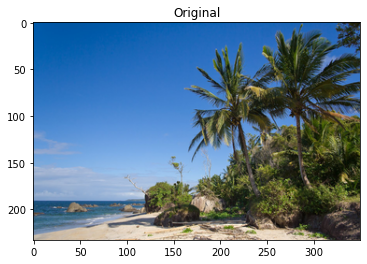

In [11]:
imagen = cv2.imread(args["imagen"])
mostrar_imagen("Original",imagen)

In [12]:
imagen.shape

(233, 350, 3)

Convertir la imagen a escala de grises

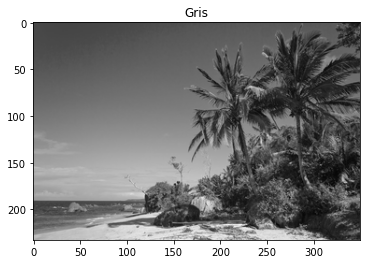

In [13]:
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
mostrar_imagen("Gris", gris)

In [14]:
imagen.shape

(233, 350, 3)

Histograma de escala de grises

In [15]:
hist = cv2.calcHist([imagen], [0], None, [256], [0, 256])

Dibujar el histograma

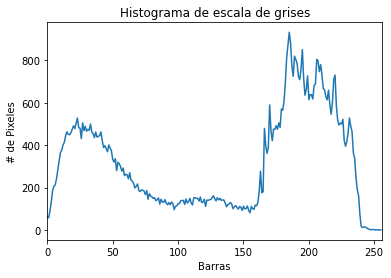

In [16]:
plt.figure()
plt.title("Histograma de escala de grises")
plt.xlabel("Barras")
plt.ylabel("# de Pixeles")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()